
Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


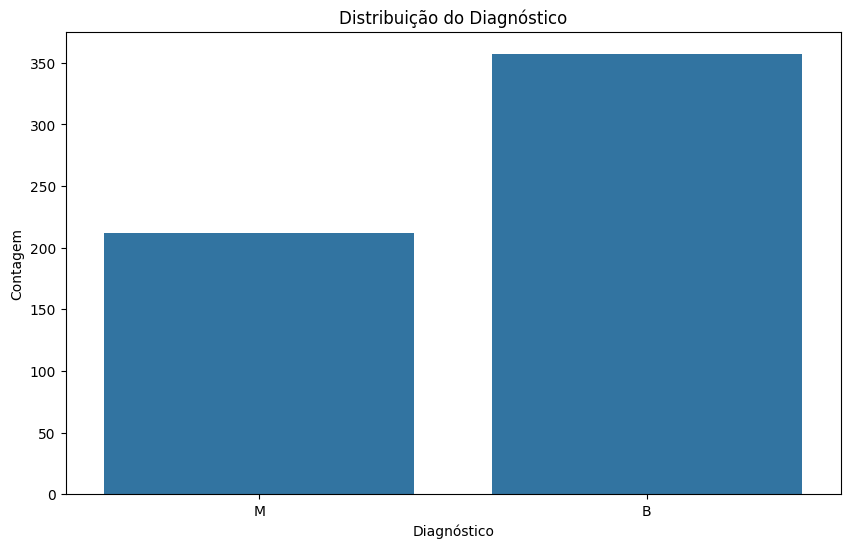

In [106]:
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif

# Para pruning
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Para quantização
import joblib
import time
import sys


RANDOM_STATE = 2  # ou qualquer outro número

# Carregar o dataset
dataset = pd.read_csv("./breast+cancer+wisconsin+diagnostic.csv", sep=",")
# dataset = datasets.load_iris(as_frame=True).frame

# Informações gerais
print("\nInformações gerais do dataset:")
dataset.info()

# Contabiliza numero de amostras por classe
print("\nContabilização de amostras por classe:")
print(dataset['diagnosis'].value_counts())

# Estatísticas descritivas
print("\nEstatísticas descritivas:")
display(dataset.describe())
# Análise da distribuição da variável alvo (diagnosis)
plt.figure(figsize=(10, 6))
sns.countplot(x='diagnosis', data=dataset)
plt.title('Distribuição do Diagnóstico')
plt.xlabel('Diagnóstico')
plt.ylabel('Contagem')
plt.savefig('/output/quality_distribution.png')
plt.show()

In [107]:
from sklearn.preprocessing import StandardScaler 

# Remove columns with all NaN values
X = dataset.drop(['diagnosis'], axis=1)
X = X.dropna(axis=1, how='all')

# # Remove as colunas id e Unnamed: 32, se existirem
# if 'id' in X.columns:
#     X = X.drop(['id'], axis=1)
# if 'Unnamed: 32' in X.columns:
#     X = X.drop(['Unnamed: 32'], axis=1)

# # Optionally, drop rows with any NaN values (or use fillna if you prefer)
# X = X.dropna(axis=0, how='any')

# Align y with the cleaned X
y = dataset.loc[X.index, 'diagnosis']

# Normalização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# X_scaled = X.values



In [108]:
# Divide os conjuntos

# Divisão em treino+validação e teste
X_temp, X_test, y_temp, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

# Divisão do conjunto temp em treino e validação
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=RANDOM_STATE, stratify=y_temp)  # 0.25*0.8=0.2

print(f"Tamanho do conjunto de treino: {X_train.shape[0]}")
print(f"Tamanho do conjunto de validação: {X_val.shape[0]}")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]}")

Tamanho do conjunto de treino: 341
Tamanho do conjunto de validação: 114
Tamanho do conjunto de teste: 114


In [109]:
## Treina o modelo de referência (baseline)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

start_time = time.time()
rf_baseline_model = DecisionTreeClassifier(
    random_state=RANDOM_STATE,
)
rf_baseline_model.fit(X_train, y_train)
rf_training_time = time.time() - start_time

# Avaliar no conjunto de validação
y_val_pred_rf = rf_baseline_model.predict(X_val)
rf_val_accuracy = accuracy_score(y_val, y_val_pred_rf)

print(f"Modelo de referência:")
print(f"Tempo de treinamento: {1000*rf_training_time:.4f} ms")
print(f"Acurácia no conjunto de validação: {rf_val_accuracy:.4f}")
print(f"Profundidade da árvore: {rf_baseline_model.get_depth()}")

Modelo de referência:
Tempo de treinamento: 8.0087 ms
Acurácia no conjunto de validação: 0.9211
Profundidade da árvore: 7


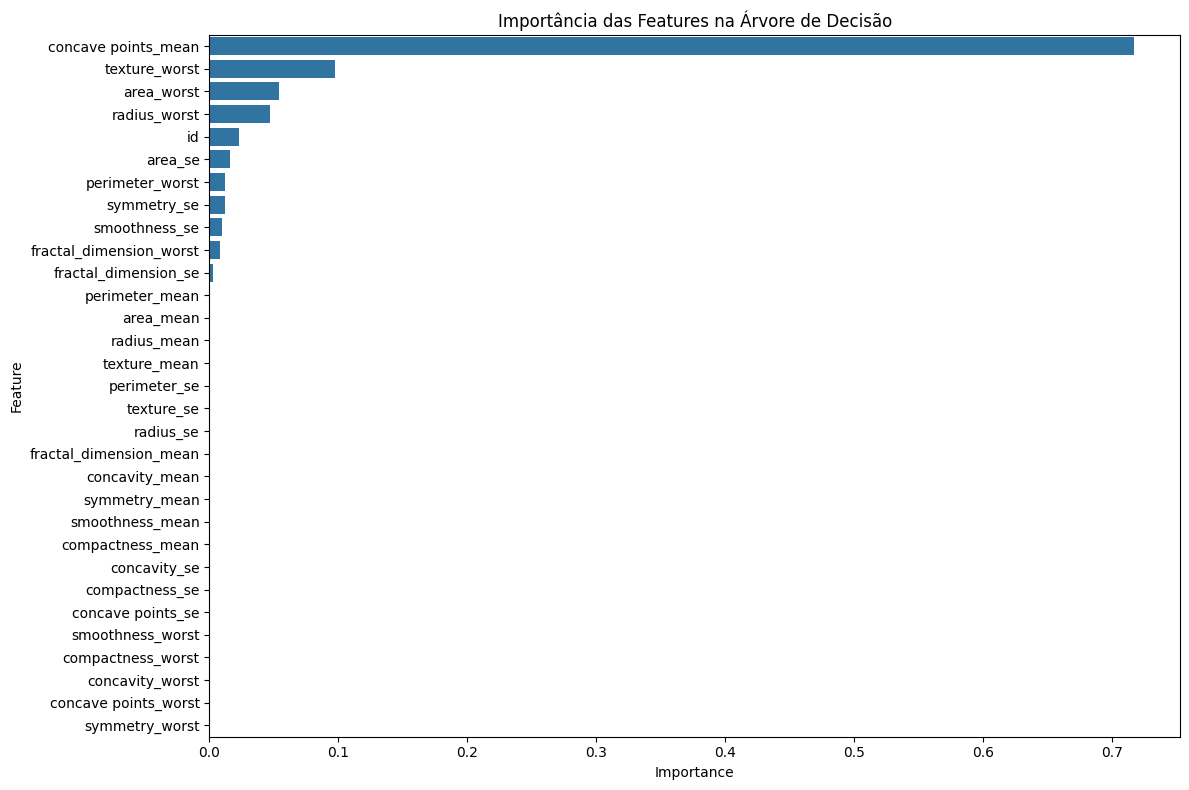

In [110]:
# Visualizar importância de features
plt.figure(figsize=(12, 8))
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_baseline_model.feature_importances_
}).sort_values('Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Importância das Features na Árvore de Decisão')
plt.tight_layout()
plt.show()


In [111]:
# Otimização do modelo com pruning de profundidade

from sklearn.model_selection import StratifiedKFold
stratified_cv = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# Definir parâmetros para pruning
param_grid = {
    'max_depth': [5,6,7,8,9, 10,11,12,13,14, 15],
}

# Aplicar GridSearchCV para encontrar melhores parâmetros
dt_grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=RANDOM_STATE),
    param_grid=param_grid,
    # cv=stratified_cv,
    # scoring=['accuracy', 'balanced_accuracy', 'f1_weighted'],
    # refit='accuracy',  # usa a taxa de acerto como métrica para o melhor modelo,
    n_jobs=-1  # Usar todos os cores disponíveis
)

dt_grid_search.fit(X_train, y_train)

# Encontrar o melhor modelo
best_pruned_model = dt_grid_search.best_estimator_

# Resultados
print(f"Melhores parâmetros: {dt_grid_search.best_params_}")
print(f"Profundidade: {best_pruned_model.max_depth:.2f}")
pruned_val_acc = accuracy_score(y_val, best_pruned_model.predict(X_val))
print(f"Acurácia no conjunto de validação: {pruned_val_acc:.4f}")



Melhores parâmetros: {'max_depth': 5}
Profundidade: 5.00
Acurácia no conjunto de validação: 0.9211


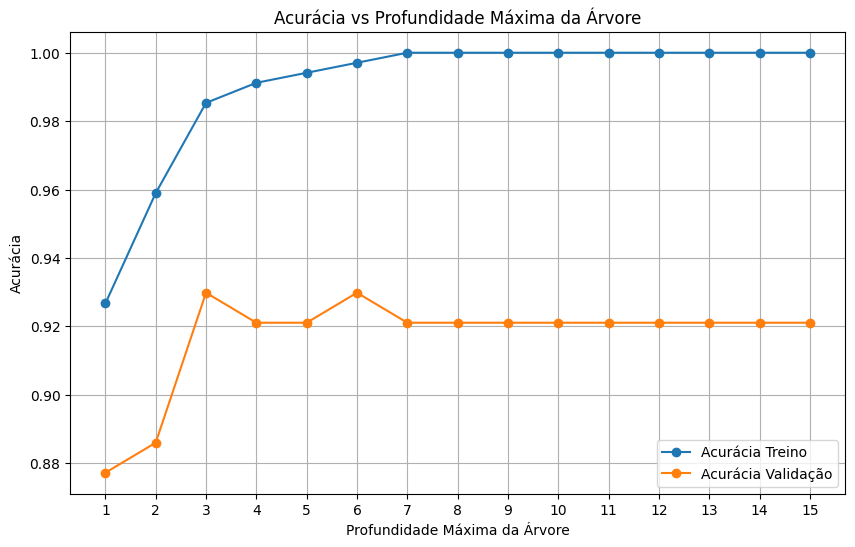

In [112]:
# Gera um gráfico variando a profundade máxima da árvore
depths = np.arange(1, 16)
train_scores = []
val_scores = []
for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=RANDOM_STATE)
    model.fit(X_train, y_train)
    
    train_scores.append(accuracy_score(y_train, model.predict(X_train)))
    val_scores.append(accuracy_score(y_val, model.predict(X_val)))
plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, label='Acurácia Treino', marker='o')
plt.plot(depths, val_scores, label='Acurácia Validação', marker='o')
plt.title('Acurácia vs Profundidade Máxima da Árvore')
plt.xlabel('Profundidade Máxima da Árvore')
plt.ylabel('Acurácia')
plt.xticks(depths)
plt.legend()
plt.grid()
plt.show()

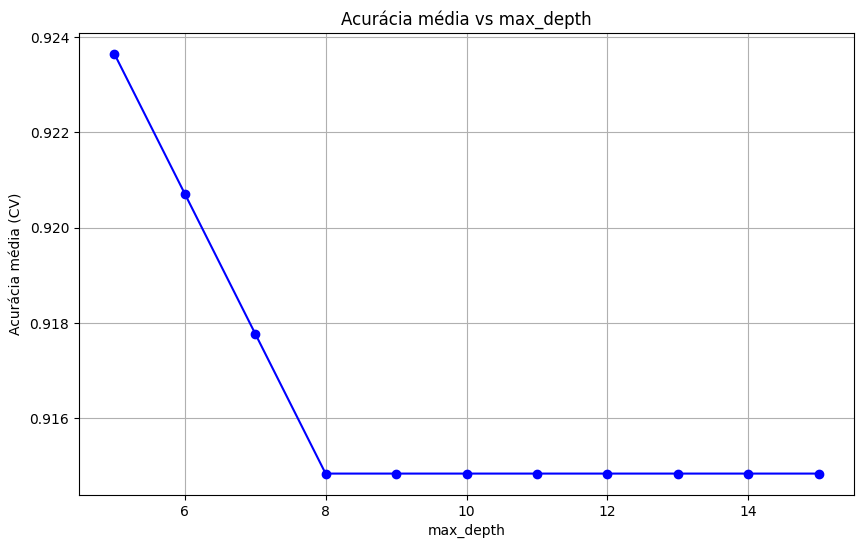

In [113]:
# Gráfico da taxa de acerto em função da profundidade máxima
results = pd.DataFrame(dt_grid_search.cv_results_)
plt.figure(figsize=(10, 6))

depth_values = []
accuracy_values = []

for depth in sorted([d for d in results['param_max_depth'].unique() if d is not None]):
    mask = results['param_max_depth'] == depth
    depth_values.append(depth)
    accuracy_values.append(results.loc[mask, 'mean_test_score'].values[0])

plt.plot(depth_values, accuracy_values, 'b-o')
plt.xlabel('max_depth')
plt.ylabel('Acurácia média (CV)')
plt.title('Acurácia média vs max_depth')
plt.grid(True)
plt.show()

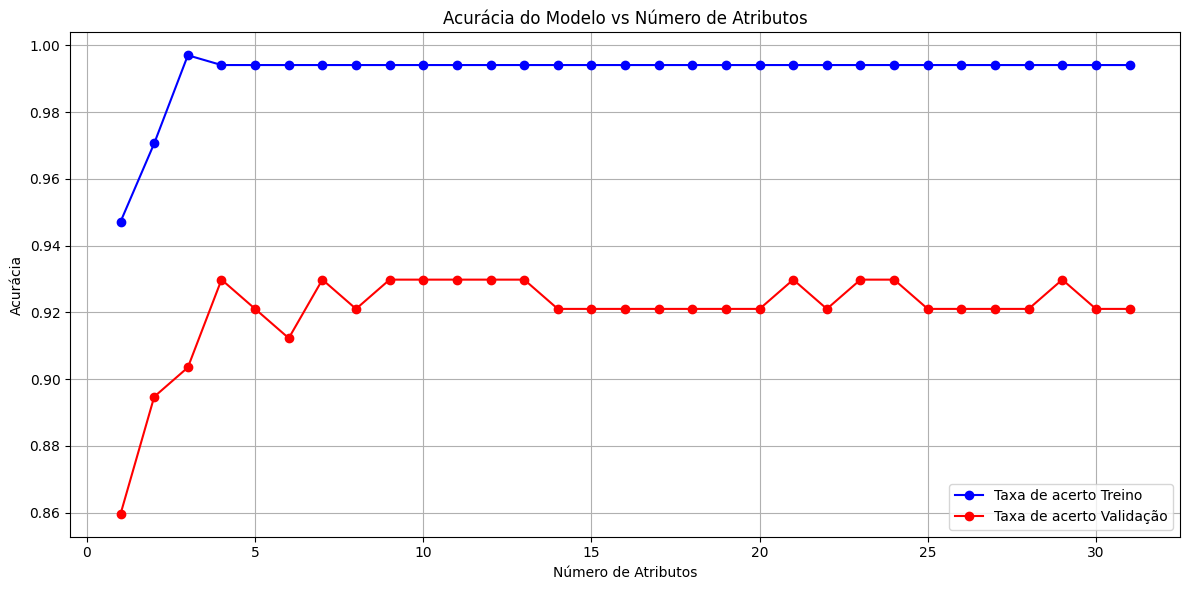


Optimal number of features: 4
Features used: concave points_mean, radius_worst, texture_worst, area_se
Validation Accuracy: 0.9298


In [114]:
## Relaciona a quantidade de features com a taxa de acerto

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_pruned_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Get ordered features from most to least important
ordered_features = feature_importance['Feature'].values

# Create lists to store results
num_features_list = []
val_accuracy_list = []
train_accuracy_list = []
feature_sets = []

# Get the best hyperparameters
max_depth = best_pruned_model.max_depth

# Iterate through different numbers of features
for i in range(1, len(ordered_features) + 1):
    # Take i most important features
    selected_features = ordered_features[:i]
    feature_sets.append(', '.join(selected_features))
    
    # Get indices of selected features
    selected_indices = [list(X.columns).index(feat) for feat in selected_features]
    
    # Select only these features from the datasets
    X_train_selected = X_train[:, selected_indices]
    X_val_selected = X_val[:, selected_indices]
    
    # Train a new model with the same hyperparameters as the best model
    model = DecisionTreeClassifier(
        max_depth=max_depth,
        random_state=RANDOM_STATE,
    )
    model.fit(X_train_selected, y_train)
    
    # Evaluate the model
    train_accuracy = accuracy_score(y_train, model.predict(X_train_selected))
    val_accuracy = accuracy_score(y_val, model.predict(X_val_selected))
    
    # Store results
    num_features_list.append(i)
    train_accuracy_list.append(train_accuracy)
    val_accuracy_list.append(val_accuracy)
    
    # print(f"Features: {i}, Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}")

# Create a DataFrame for the results
results_df = pd.DataFrame({
    'Number of Features': num_features_list,
    'Training Accuracy': train_accuracy_list,
    'Validation Accuracy': val_accuracy_list,
    'Features Used': feature_sets
})

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(num_features_list, train_accuracy_list, 'b-o', label='Taxa de acerto Treino')
plt.plot(num_features_list, val_accuracy_list, 'r-o', label='Taxa de acerto Validação')
plt.xlabel('Número de Atributos')
plt.ylabel('Acurácia')
plt.title('Acurácia do Modelo vs Número de Atributos')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Find the optimal number of features (highest validation accuracy)
optimal_idx = val_accuracy_list.index(max(val_accuracy_list))
optimal_features = num_features_list[optimal_idx]
print(f"\nOptimal number of features: {optimal_features}")
print(f"Features used: {feature_sets[optimal_idx]}")
print(f"Validation Accuracy: {val_accuracy_list[optimal_idx]:.4f}")

# Show detailed results table
# display(results_df)

# Define o número de features ótimas como 3 pois houve pouca queda na taxa de acerto
# optimal_features = 30



Usando as 4 features mais importantes: concave points_mean, radius_worst, texture_worst, area_se
Acurácia do modelo prunado com menos features no conjunto de validação: 0.9298
Bits: 1, Acurácia: 0.8684
Bits: 2, Acurácia: 0.8684
Bits: 4, Acurácia: 0.9035
Bits: 8, Acurácia: 0.8860
Bits: 16, Acurácia: 0.8860
Bits: 32, Acurácia: 0.8860


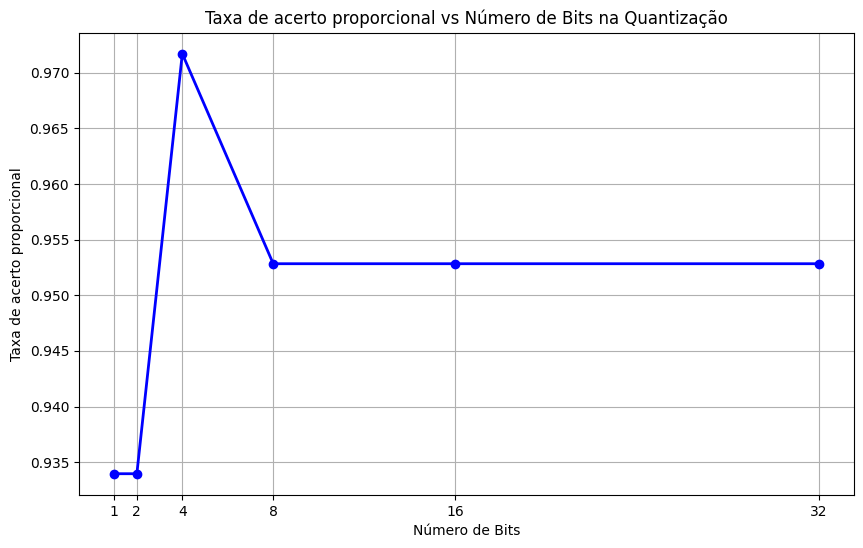


Melhor número de bits: 4
Melhor taxa de acerto relativa: 0.9717
Resultado quantizado no conjunto de validação:
Acurácia do modelo quantizado no conjunto de validação: 0.9035


In [115]:
## Quantização do modelo

class my_quantized_DT():
    """
    Navigation through quantized Decision Tree
    Tiago Oliveira Weber 2023 (parte inicial)
    """

    def __init__(self, clf, bits):
        # clf is a sklearn tree classifier
        levels = 2**bits
        max_value = levels-1
        min_value = 0

        # # TESTE
        # self = clf

        # quantizando parâmetros da árvore
        self.threshold = clf.tree_.threshold*max_value
        self.threshold = np.floor(self.threshold)
        self.threshold = self.threshold.astype(
            'int')         # value of comparison
        # sets to zero if threshold is negative
        self.threshold = np.maximum(self.threshold, 0)

        # extraindo os valores da dt do sklearn
        self.children_left = clf.tree_.children_left     # next node if left
        self.children_right = clf.tree_.children_right   # next node if right
        self.feature = clf.tree_.feature    # feature to be compared with
        self.value = clf.tree_.value    # number of members for each class

        # TESTE
        # self.tree_ = clf.tree_  # tree structure
        self.tree_ = self  # tree structure
        self.n_features_in_ = clf.n_features_in_  # number of features
        self.n_classes_ = clf.n_classes_  # number of classes
        self.classes_ = clf.classes_  # class labels
        self.node_count = clf.tree_.node_count  # number of nodes in the tree
        self.max_depth = clf.tree_.max_depth  # maximum depth of the tree

    def predict(self, X_qt):
        Y = []
        for x in X_qt:
            y = -2  # temp
            node = 0  # resets to root
            while (y < 0):  # not leaf
                next_node, y = self.predict_in_node(node, x)
                node = next_node

            Y.append(y)

        return Y

    def predict_in_node(self, node, x):
        y = -2  # temp
        if (self.feature[node] < 0):  # it is a leaf
            next_node = -1  # does not matter
            y = np.argmax(self.value[node])  # plurality result

        else:
            if x[self.feature[node]] < self.threshold[node]:
                next_node = self.children_left[node]
            else:
                next_node = self.children_right[node]

        return next_node, y
    
# Seleciona apenas as features mais importantes
selected_features = ordered_features[:optimal_features]
print(f"Usando as {optimal_features} features mais importantes: {', '.join(selected_features)}")

# Obtem os índices das features selecionadas
selected_indices = [list(X.columns).index(feat) for feat in selected_features]

# Seleciona apenas as features importantes dos conjuntos de dados
X_train_selected = X_train[:, selected_indices]
X_val_selected = X_val[:, selected_indices]
X_test_selected = X_test[:, selected_indices]    
    
modelo_punado_menos_features = DecisionTreeClassifier(
    max_depth=best_pruned_model.max_depth,
    random_state=RANDOM_STATE,
    # class_weight='balanced'
)
modelo_punado_menos_features.fit(X_train_selected, y_train)

accuracy_score_val_quantizado = accuracy_score(y_val, modelo_punado_menos_features.predict(X_val_selected))
print(f"Acurácia do modelo prunado com menos features no conjunto de validação: {accuracy_score_val_quantizado:.4f}")


# Lista para armazenar as acurácias
acuracias = []
bits_range = [1,2,4,8,16,32]  # testa de 1 a 32 bits

# Para cada número de bits
for bits in bits_range:
    # Cria o modelo quantizado
    clf_qt = my_quantized_DT(modelo_punado_menos_features, bits)

    # Quantiza os dados
    max_value = 2**bits-1

    X_temp = X_val_selected * max_value
    X_temp = np.floor(X_temp)
    X_qt = X_temp.astype(int)

    # Faz as previsões
    Y_qt = clf_qt.predict(X_qt)

    # Converte os índices de volta para os rótulos originais
    Y_qt_labels = [modelo_punado_menos_features.classes_[i] for i in Y_qt]

    # Calcula a acurácia
    acuracia = accuracy_score(y_val, Y_qt_labels)
    acuracias.append(acuracia/accuracy_score_val_quantizado)

    print(f"Bits: {bits}, Acurácia: {acuracia:.4f}")


# Plota os resultados
plt.figure(figsize=(10, 6))
plt.plot(bits_range, acuracias, 'b-o', linewidth=2)
plt.xlabel('Número de Bits')
plt.ylabel('Taxa de acerto proporcional')
plt.title('Taxa de acerto proporcional vs Número de Bits na Quantização')
plt.grid(True)
plt.xticks(bits_range)
plt.show()

# Encontra o melhor número de bits
melhor_bits = bits_range[np.argmax(acuracias)]
print(f"\nMelhor número de bits: {melhor_bits}")
print(f"Melhor taxa de acerto relativa: {max(acuracias):.4f}")

modelo_quantizado = my_quantized_DT(modelo_punado_menos_features, melhor_bits)

# Quantiza os dados de validação
max_value = 2**melhor_bits-1
X_temp = X_val_selected * max_value
X_temp = np.floor(X_temp)
X_qt = X_temp.astype(int)
X_val_quantizado = X_qt

# Qauntiza os dados de teste
X_temp = X_test_selected * max_value
X_temp = np.floor(X_temp)
X_qt = X_temp.astype(int)
X_test_quantizado = X_qt



print(f"Resultado quantizado no conjunto de validação:")
Y_qt = modelo_quantizado.predict(X_val_quantizado)
# Converte os índices de volta para os rótulos originais
Y_qt_labels = [modelo_punado_menos_features.classes_[i] for i in Y_qt]
# Avalia a acurácia do modelo quantizado
accuracy_quantizado = accuracy_score(y_val, Y_qt_labels)
print(f"Acurácia do modelo quantizado no conjunto de validação: {accuracy_quantizado:.4f}")


In [116]:
# Código para verificar a quantização
import numpy as np
import matplotlib.pyplot as plt

# 1. Crie uma função para comparar os thresholds
def verificar_quantizacao(modelo_original, modelo_quantizado, bits, max_nodes=10):
    # Obtenha os thresholds originais e quantizados
    thresholds_originais = modelo_original.tree_.threshold
    thresholds_quantizados = modelo_quantizado.threshold
    
    # Calcule o valor máximo da quantização
    max_value = 2**bits - 1
    
    # Imprima uma comparação lado a lado (limitando para não sobrecarregar)
    print(f"\n{'Índice do Nó':<12}{'Original':<15}{'Quantizado':<15}{'Esperado':<15}")
    print("-" * 57)
    
    # Pegue apenas nós que não são folhas (threshold >= 0)
    nos_internos = np.where(modelo_original.tree_.feature >= 0)[0][:max_nodes]
    
    for i in nos_internos:
        valor_original = thresholds_originais[i]
        valor_quantizado = thresholds_quantizados[i]
        valor_esperado = np.floor(valor_original * max_value)
        
        # Verifique se é um nó interno
        if valor_original >= 0:
            print(f"{i:<12}{valor_original:<15.6f}{valor_quantizado:<15}{valor_esperado:<15.1f}")
    
    # Visualize a distribuição dos valores
    plt.figure(figsize=(12, 5))
    
    # Plot dos valores originais (escalados)
    plt.subplot(1, 2, 1)
    plt.hist(thresholds_originais[thresholds_originais >= 0] * max_value, 
             bins=30, alpha=0.7, label='Original (escalado)')
    plt.xlabel('Threshold * max_value')
    plt.ylabel('Contagem')
    plt.title(f'Thresholds originais * {max_value}')
    
    # Plot dos valores quantizados
    plt.subplot(1, 2, 2)
    plt.hist(thresholds_quantizados[thresholds_quantizados >= 0], 
             bins=30, alpha=0.7, label='Quantizado')
    plt.xlabel('Threshold')
    plt.ylabel('Contagem')
    plt.title('Thresholds quantizados')
    
    plt.tight_layout()
    plt.show()
    
    # Verifique se todos os valores quantizados são inteiros
    quantizados_sao_inteiros = np.all(np.mod(thresholds_quantizados, 1) == 0)
    print(f"\nTodos os thresholds são inteiros? {quantizados_sao_inteiros}")


# 3. Execute a verificação
# verificar_quantizacao(modelo_quantizado, modelo_quantizado_teste, melhor_bits)

print(modelo_punado_menos_features.tree_.threshold)

print(modelo_quantizado.tree_.threshold)

[-0.08909618  0.30768533  0.86880179  0.02635631  0.72754973 -2.
 -2.         -0.31350382 -2.         -2.         -2.         -2.
 -0.44818246  0.31389782  0.04632223 -0.0195814  -2.         -2.
 -2.         -2.         -0.59101167 -2.         -0.5630967   0.55900639
 -2.         -2.         -2.        ]
[ 0  4 13  0 10  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  8
  0  0  0]


In [123]:
# Verifica a taxa de acerto do baseline e quantizado no conjunto de teste

# Faz a predição no conjunto de teste
y_test_pred_baseline = rf_baseline_model.predict(X_test)
# Avalia a acurácia do modelo baseline no conjunto de teste
accuracy_test_baseline = accuracy_score(y_test, y_test_pred_baseline)
print(f"Acurácia do modelo baseline no conjunto de teste: {accuracy_test_baseline*100:.3f}")

# Faz a predição no conjunto de teste com o modelo quantizado
y_test_pred_quantizado = modelo_quantizado.predict(X_test_quantizado)
# Converte os índices de volta para os rótulos originais
y_test_pred_quantizado_labels = [modelo_quantizado.classes_[i] for i in y_test_pred_quantizado]
# Avalia a acurácia do modelo quantizado no conjunto de teste
accuracy_test_quantizado = accuracy_score(y_test, y_test_pred_quantizado_labels)
print(f"Acurácia do modelo quantizado no conjunto de teste: {accuracy_test_quantizado*100:.3f}")

# Informações sobre o modelo quantizado
print(f"\nModelo quantizado com {melhor_bits} bits:")
print(f"Profundidade da árvore: {modelo_quantizado.tree_.max_depth}")
print(f"Número de parâmetros: {optimal_features}")

Acurácia do modelo baseline no conjunto de teste: 87.719
Acurácia do modelo quantizado no conjunto de teste: 92.105

Modelo quantizado com 4 bits:
Profundidade da árvore: 5
Número de parâmetros: 4


In [118]:
## Salva o dataset para uso no terminal python

import joblib

# Salva os dados baseline
joblib.dump((X_test, y_test), './stm32_firmware/Core/breast_cancer.pkl') 

# Salva os dados quantizados
joblib.dump((X_test_quantizado, y_test), './stm32_firmware/Core/breast_cancer_quantized.pkl')

['./stm32_firmware/Core/breast_cancer_quantized.pkl']

In [124]:
# Converte para o formato C para uso em microcontroladores
import emlearn

# Converter para C
cmodel = emlearn.convert(modelo_quantizado,
                         kind='RandomForestClassifier',
                         dtype='int8_t',
                         )
# cmodel = emlearn.convert(rf_baseline_model,
#                         #  kind='decision_tree', 
#                          dtype='float',
#                          )

print(melhor_bits)

# modelo_final.
# rf_baseline_model.n_features_in_

cmodel.save(file='./stm32_firmware/Core/Inc/modelo_convertido.h')

4


'\n\n\n    // !!! This file is generated using emlearn !!!\n\n    #include <eml_trees.h>\n    \n\nstatic const EmlTreesNode modelo_convertido_nodes[13] = {\n  { 0, 0, 1, 6 },\n  { 1, 4, 1, -1 },\n  { 3, 13, 1, -1 },\n  { 3, 0, 1, 2 },\n  { 2, 10, -2, -2 },\n  { 0, 0, -2, -1 },\n  { 2, 0, 1, 4 },\n  { 1, 4, 1, -1 },\n  { 0, 0, 1, -2 },\n  { 0, 0, -2, -1 },\n  { 3, 0, -2, 1 },\n  { 1, 0, 1, -1 },\n  { 2, 8, -2, -1 } \n};\n\nstatic const int32_t modelo_convertido_tree_roots[1] = { 0 };\n\nstatic const uint8_t modelo_convertido_leaves[2] = { 1, 0 };\n\nEmlTrees modelo_convertido = {\n        13,\n        (EmlTreesNode *)(modelo_convertido_nodes),\t  \n        1,\n        (int32_t *)(modelo_convertido_tree_roots),\n        2,\n        (uint8_t *)(modelo_convertido_leaves),\n        0,\n        4,\n        2,\n    };\n\nstatic inline int32_t modelo_convertido_tree_0(const int8_t *features, int32_t features_length) {\n          if (features[0] < 0) {\n              if (features[1] < 4) {\n   

In [120]:

# For more readable output with feature names
import pandas as pd

print("\nPrimeiras 4 respostas:")
print(y_test[:2])

# Display the first 2 lines of y_test
length = len(X_test[0])
print(f"\nPrimeiras 4 linhas do dataset baseline. {length} features):")
print(X_test[:2])


# debug modelo quantizado
length = len(X_test_quantizado[0])
print(f"\nPrimeiras 4 linhas do dataset quantizado. {length} features):")
print(X_test_quantizado[:2])





Primeiras 4 respostas:
414    M
528    B
Name: diagnosis, dtype: object

Primeiras 4 linhas do dataset baseline. 31 features):
[[-0.23589778  0.28478338  2.44815641  0.19528136  0.18376002 -0.93655723
  -1.10470039 -0.5265469  -0.55532241  0.1474301  -1.39741877  0.22712017
   0.74414693  0.0875911   0.11095288 -0.06999581 -0.62641772 -0.23222238
  -0.43944822  1.32795285 -0.77348763  0.20517948  1.82918796  0.08455566
   0.08933162 -0.77013498 -0.98986549 -0.56365376 -0.74391404  0.53749837
  -1.23554094]
 [-0.23579761 -0.05319351 -1.42408329 -0.06833592 -0.17260604  2.02392516
  -0.1286992   0.15317924  0.44445235  0.60014708  0.25125475  0.50863855
   2.57300558  0.60638318  0.09687179  0.99971423  0.3907719   0.52176832
   2.71439431 -0.41073446  0.65554594 -0.3415184  -1.67683887 -0.3795077
  -0.3995439   0.30822795 -0.74978636 -0.55789673 -0.19956318 -1.19838023
  -0.63261684]]

Primeiras 4 linhas do dataset quantizado. 4 features):
[[ -9   3  27   1]
 [  6  -6 -26   1]]
